In [1]:
import timeit
start_time = timeit.default_timer()

In [48]:
start_time

9.330625585788338e-07

# Assignment #5 - Deep Learning

### <font color="red"> DUE: Apr 23 (Tuesday) 11:00 pm </font>  

<font color="blue">Gaurav Mahadik</font>

# I. Overview

The obective of this assignment is to understand what is deep learning and how can we impement it using Tensorflow or Keras as instructed to us. I have used Keras in this assignment to implement deep learning. The data has been preprocessed and visualized and nomralized to be used ahead. I have used the Sequential model in Keras to create different neural network structures which have been implemented in this assignment.

# II. Data

# Introduction of Data

The data set which has been used is a Bank Marketing Dataset which is a record of all the marketing dont by the bank to get customers to deposit money in their bank. This data set is having 11162 rows and 17 columns.This dataset has a binary variable deposit (Yes = yes, No = no) as target variable.The dataset gives you information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

# Source of the Data

https://www.kaggle.com/janiobachmann/bank-marketing-dataset

# Reading the Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank.csv")

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# Preprocessing the Data

In [5]:
df1 = df

In [6]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
df1 = df1.drop(columns=['default', 'loan','contact','poutcome','job','previous','pdays'])

In [8]:
 df1.head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
0,59,married,secondary,2343,yes,5,may,1042,1,yes
1,56,married,secondary,45,no,5,may,1467,1,yes
2,41,married,secondary,1270,yes,5,may,1389,1,yes
3,55,married,secondary,2476,yes,5,may,579,1,yes
4,54,married,tertiary,184,no,5,may,673,2,yes


In [9]:
df1.isnull().head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


In [10]:
df1.isnull().values.any()

False

In [11]:
df1.isnull().sum()

age          0
marital      0
education    0
balance      0
housing      0
day          0
month        0
duration     0
campaign     0
deposit      0
dtype: int64

In [12]:
encoding_dict = {"marital" : {"single":1 , "married":2 , "divorced":3},
                 "housing" : {"no": -1 , "yes": 1},
                 "month" : {"jan":1,"feb":2,"mar":3,"apr":4,"may":5,"jun":6,"jul":7,"aug":8,"sep":9,"oct":10,"nov":11,"dec":12},
                 "deposit": {"no":0,"yes":1},
                 "education" :{"unknown":0,"primary":1,"secondary":2,"tertiary":3}
                }

In [13]:
df1.replace(encoding_dict, inplace = True)

In [14]:
df1.head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
0,59,2,2,2343,1,5,5,1042,1,1
1,56,2,2,45,-1,5,5,1467,1,1
2,41,2,2,1270,1,5,5,1389,1,1
3,55,2,2,2476,1,5,5,579,1,1
4,54,2,3,184,-1,5,5,673,2,1


# Visualizing the Data

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
groupName = []                                    #making different groups of genders to be plotted ahead
count = []
for group_name, subset in df1.groupby('education'):
    groupName.append(group_name)
    count.append(len(subset))
print(groupName)
print(count)

[0, 1, 2, 3]
[497, 1500, 5476, 3689]


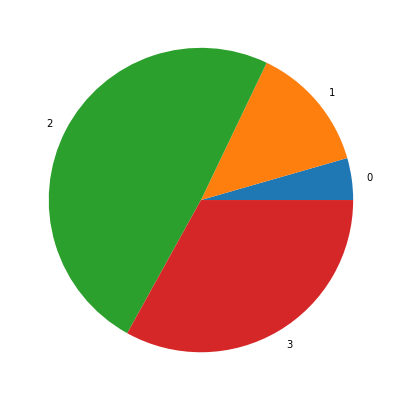

In [17]:
plt.figure(figsize = (7, 7))
plt.pie(count, labels = groupName)
plt.show()

Text(0.5, 1.0, 'Campaign Count Plot')

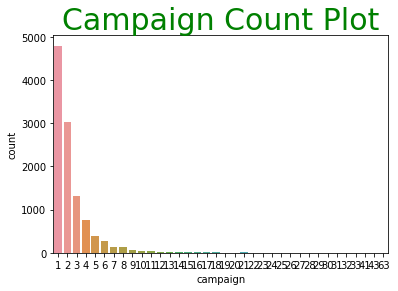

In [18]:
sns.countplot(df1.campaign)
plt.title("Campaign Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Marriage Count Plot')

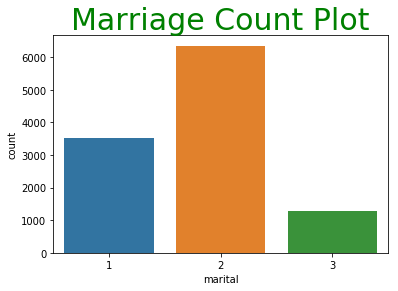

In [19]:
sns.countplot(df1.marital)
plt.title("Marriage Count Plot", color = 'green', fontsize = 30)

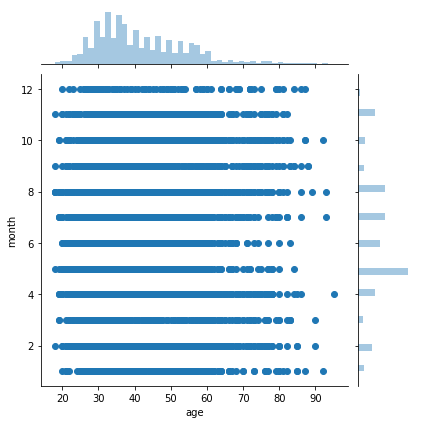

In [20]:
sns.jointplot(df1['age'],df1['month'])

Text(0.5, 1.0, 'Marriage Age Count Plot')

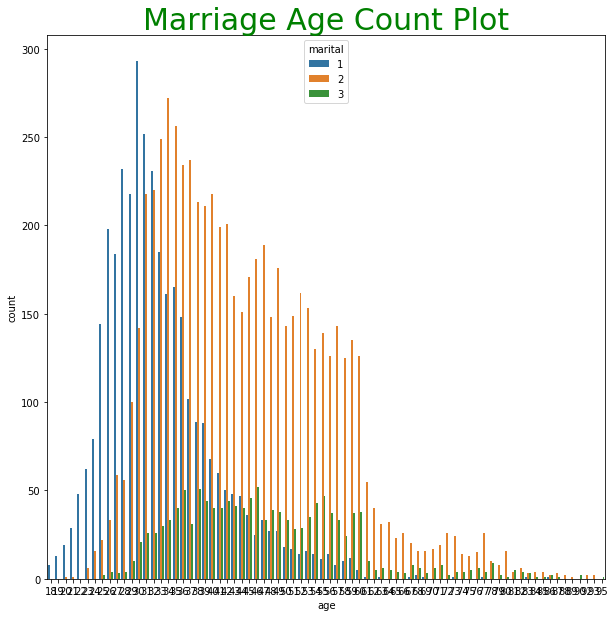

In [21]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df1['age'],hue=df1['marital'])
plt.title("Marriage Age Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Age Deposit Count Plot')

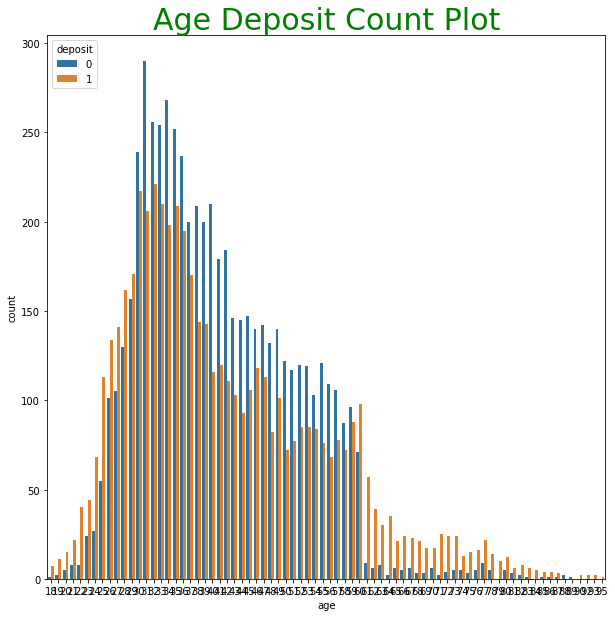

In [22]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df1['age'],hue=df1['deposit'])
plt.title("Age Deposit Count Plot", color = 'green', fontsize = 30)

Text(0.5, 1.0, 'Marriage Deposit Count Plot')

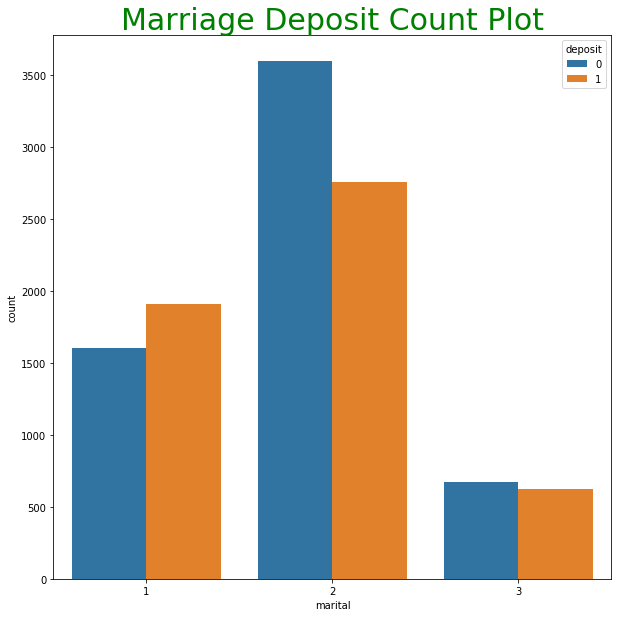

In [23]:
fig = plt.subplots(figsize=(10,10))
sns.countplot(df1['marital'],hue=df1['deposit'])
plt.title("Marriage Deposit Count Plot", color = 'green', fontsize = 30)

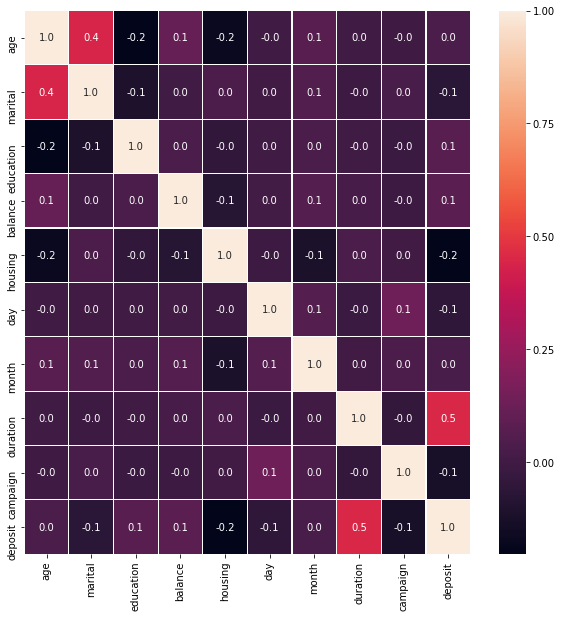

In [24]:
f = plt.subplots(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True, linewidths=.1,fmt= '.1f')
plt.show()

# Preliminary Observations

Visualization of data has been performed above and the following are the observations that we can observe from the visualizations performed above.

1.There are a large number of people who have secondary education compared to the other people in this particular dataset. Around 50 % of the people have secondary education as we can see from the pie diagram above. 

2.We can see that a lot of different campaigns were used to do the marketing of the the schemes the bank had for the customers.However predominantly campaign 1 has been used extensively in this particualar dataset.

3.We can see that we have a mix of three types of people in terms of marital status. Among the large number of people that we have a large portion of them are married followed by single people and then divorced people.

4.We can see in the age month plot that most people who have been contacted by the bank are in the range of 25 to 45 and most of them have been contacted in the month of May

5.The marriage age plot shows us how the age of the people coupled along with their marital status. The following Age deposit plot shows us the age of the people coupled with their decision to deposit or not.

6.The Marriage deposit plot shows the marital status coupled along with the deposit and we can observe that married people are more likely to deposit in the bank followed by single and then the divorced people.

7.The heat map shows the degree of correlation that exists between the different feature vvariables present in the dataset as it can be observed in the above heatmap

# III. Methods

In this assignment, you are building a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow (or Keras) codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)

# Explanation of the choice for 3 different neural network structures and reason for the selection.

In this assignment I have used the Sequential model in Keras to implement three different neural network structures. In the sequential model in Keras we can create different neural network strcutures by changing the number of neurons for each activation fucntion that has been used. Also we have different types of optimizers which I have used to understand and implement the sequential model in Keras.

In the first model I have kept it simple and used the tanh as  the activation fucntion for the first layer of the sequential model followed by five hidden layers having different number of neurons corresponding to the activation function which is tanh only in this case as I want to see how the sequential model works for less number of neurons having the same activation function throughout all the layers the first layer as well as the hidden layers. The reason for choosing this kind of structure is that doing this for the first time I want to see how the model behaves for a small number of hidden layers all having the same activation fucntion which is being used in model 1. After Implementing the model and running it we will get the results which we can analyse later in the results section.

In the second model I have tried to kick it up a notch by increasing the number of hidden layers as I want to see what happens when we increase the number of layers.I have used tanh as the activation fucntion to understand how the model changes the output when the first layers has the activation function as tanh with the hidden layers having different activation layers. I have increased the number of neurons for each hidden layer. I have taken eight hidden layers in which the first four layers I have used the tanh activation function and for the next four layers I have used the relu activation function. I have tried to make a new neural network structure by change the exitisting structure of the first model by increasing the number of hidden layers, the number of neurons in each of those layers, the activation function used in each of these layers and the optimizer is also different than what has been used earlier. After making these changes I want to see how the model processes the data and what is the change in the result after altering the existing model to create a new neural network structure.

In the third model I have tried to make an even further different neural network structure to observe what happens after further increasing the number of hidden layers and the number of neurons in each of those layers and the activation fucntions that will be applied in each of those layers. I have used the same activation function tanh as the activation fucntion for the first layer. For the hidden layers I have added a few more hidden layers to make the number to hidden layers twelve and varying the number of neurons in each of these hidden layers and the activation functions which I have used in this model are relu,elu and tanh. I have tried to make a third different neural network structure by changing the second model. The reason for this selection is to obsevre how the sequential model processes the data after altering the neural network structure further and analysing how the result changes after the creation of new neural network structure.

In [25]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras
from keras import models, layers, losses, optimizers, metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.optimizers import SGD, Adam, RMSprop
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *
import matplotlib.patches as mpatches

Using TensorFlow backend.


In [26]:
df1.head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
0,59,2,2,2343,1,5,5,1042,1,1
1,56,2,2,45,-1,5,5,1467,1,1
2,41,2,2,1270,1,5,5,1389,1,1
3,55,2,2,2476,1,5,5,579,1,1
4,54,2,3,184,-1,5,5,673,2,1


In [27]:
def normalize(X):
    return (X/X.max())

In [28]:
df1["month"] = normalize(df1["month"])
df1["duration"] = normalize(df1["duration"])
df1["campaign"] = normalize(df1["campaign"])
df1["day"] = normalize(df1["day"])
df1["age"] = normalize(df1["age"])
df1["marital"] = normalize(df1["marital"])
df1["education"] = normalize(df1["education"])
df1["balance"] = normalize(df1["balance"])
df1["housing"] = normalize(df1["housing"])

In [29]:
df1.head()

,age,marital,education,balance,housing,day,month,duration,campaign,deposit
0,0.621053,0.666667,0.666667,0.028853,1.0,0.16129,0.416667,0.268488,0.015873,1
1,0.589474,0.666667,0.666667,0.000554,-1.0,0.16129,0.416667,0.377995,0.015873,1
2,0.431579,0.666667,0.666667,0.015640,1.0,0.16129,0.416667,0.357897,0.015873,1
3,0.578947,0.666667,0.666667,0.030491,1.0,0.16129,0.416667,0.149188,0.015873,1
4,0.568421,0.666667,1.000000,0.002266,-1.0,0.16129,0.416667,0.173409,0.031746,1


In [30]:
data = df1.sample(10000)

In [31]:
X=data.iloc[:,0:-1]
X = X.as_matrix()
X.shape

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


(10000, 9)

In [32]:
T=data.iloc[:,-1]
T = T.as_matrix()
T = T.reshape(T.shape[0],1)

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [33]:
T.shape

(10000, 1)

In [34]:
normalize = StandardScaler()
norm_x = normalize.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(norm_x, T, test_size=0.2, random_state=1)

In [35]:
X_train.shape

(8000, 9)

In [36]:
def activation_function_addition(model,neu,act):
    for x in range(len(neu)):
        model.add(Dense(units=neu[x], activation=act[x]))
    return model

# MODEL 1

# Explanation of codes for structure 1

In this model I have invoked the sequential model of Keras and added an initial layer with tanh as the activation fucntion. The number of neurons for each activation fucntion are present in the list neurons_for_each_activation_fucntion and the different hidden layers has the activation fucntions stored in hd_activation_funcions. These layers are added to the model and then the Adam optimizer has been used to optimize the model and later the model is complied with the loss being binary_crossentropy and taccuracy is the metric being considered. Now the model is fit on the training data and validated on the testing data with the number of epochs being as displayed.

In [37]:
M1=keras.models.Sequential()
model = M1.add(Dense(input_dim=9, units=9,activation='tanh'))
neurons_for_each_activation_fucntion = [10,11,12,14,1]
hd_activation_funcions = ['tanh','tanh','tanh','tanh','tanh']
model1=activation_function_addition(M1,neurons_for_each_activation_fucntion,hd_activation_funcions)
opt1 = optimizers.Adam(lr=0.001)
M1.compile(opt1, loss='binary_crossentropy', metrics=['accuracy'])
res1 = model1.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 221us/step - loss: 1.2944 - acc: 0.5835 - val_loss: 0.6035 - val_acc: 0.6595
Epoch 2/10
8000/8000 [==============================] - 0s 62us/step - loss: 0.7136 - acc: 0.5756 - val_loss: 0.8790 - val_acc: 0.4405
Epoch 3/10
8000/8000 [==============================] - 1s 97us/step - loss: 0.8522 - acc: 0.4484 - val_loss: 0.8291 - val_acc: 0.4445
Epoch 4/10
8000/8000 [==============================] - 1s 94us/step - loss: 0.8066 - acc: 0.4599 - val_loss: 0.7865 - val_acc: 0.4600
Epoch 5/10
8000/8000 [==============================] - 1s 93us/step - loss: 0.7657 - acc: 0.4709 - val_loss: 0.7477 - val_acc: 0.4675
Epoch 6/10
8000/8000 [==============================] - 1s 88us/step - loss: 0.7282 - acc: 0.4855 - val_loss: 0.7117 - val_acc: 0.4840
Epoch 7/10
8000/8000 

# Model 2

# Explanation of codes for structure 2

In this model I have invoked the sequential model of Keras and added an initial layer with tanh as the activation fucntion. The number of neurons for each activation fucntion are present in the list neurons_for_each_activation_fucntion and the different hidden layers has the activation fucntions stored in hd_activation_funcions. These layers are added to the model and then the RMSprop optimizer has been used to optimize the model and later the model is complied with the loss being binary_crossentropy and accuracy is the metric being considered. Now the model is fit on the training data and validated on the testing data with the number of epochs being as displayed. This model the is different because of the increase in the number of hidden layers and the number of neurons for each hidden layer and the activation fucntions for each hidden layers as it is seen in the code below.

In [38]:
M2=keras.models.Sequential()
model = M2.add(Dense(input_dim=9, units=9,activation='tanh'))
neurons_for_each_activation_fucntion = [15,30,35,40,45,50,55,1]
hd_activation_funcions = ['tanh','tanh','tanh','tanh','relu','relu','relu','relu']
model = activation_function_addition(M2,neurons_for_each_activation_fucntion,hd_activation_funcions)
opt2 = optimizers.RMSprop(lr=0.0001)
M2.compile(opt2, loss='binary_crossentropy', metrics=['accuracy'])
res2 = M2.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 139us/step - loss: 1.0082 - acc: 0.6041 - val_loss: 0.5638 - val_acc: 0.7170
Epoch 2/10
8000/8000 [==============================] - 0s 60us/step - loss: 0.5687 - acc: 0.7255 - val_loss: 0.5187 - val_acc: 0.7525
Epoch 3/10
8000/8000 [==============================] - 1s 77us/step - loss: 0.5344 - acc: 0.7466 - val_loss: 0.4970 - val_acc: 0.7700
Epoch 4/10
8000/8000 [==============================] - 1s 64us/step - loss: 0.5191 - acc: 0.7569 - val_loss: 0.4777 - val_acc: 0.7785
Epoch 5/10
8000/8000 [==============================] - 1s 85us/step - loss: 0.5059 - acc: 0.7591 - val_loss: 0.4771 - val_acc: 0.7840
Epoch 6/10
8000/8000 [==============================] - 1s 73us/step - loss: 0.5094 - acc: 0.7636 - val_loss: 0.4720 - val_acc: 0.7855
Epoch 7/10
8000/8000 [==============================] - 1s 65us/step - loss: 0.5081 - acc: 0.7671 - val_loss: 0.4819 - val_acc: 0.7855
Epoch 

# Model 3

# Explanation of codes for structure 3

In this model I have invoked the sequential model of Keras and added an initial layer with tanh as the activation fucntion. The number of neurons for each activation fucntion are present in the list neurons_for_each_activation_fucntion and the different hidden layers has the activation fucntions stored in hd_activation_funcions. These layers are added to the model and then the Nadam optimizer has been used to optimize the model and later the model is complied with the loss being binary_crossentropy and taccuracy is the metric being considered. Now the model is fit on the training data and validated on the testing data with the number of epochs being as displayed. This model is different in the sense of even further increase in the number of hidden layers and the number of neurons for each hidden layer and the different activation fucntions for each of these hidden layers. Alsot he learning rate is changed to see how the model varies to different learning rates.

In [39]:
M3=keras.models.Sequential()
model = M3.add(Dense(input_dim=9, units=9,activation='tanh'))
neurons_for_each_activation_fucntion = [5,10,15,30,45,55,60,65,68,70,72,1]
hd_activation_funcions =['relu','elu','tanh','relu','elu','tanh','relu','elu','tanh','relu','elu','tanh'] 
model = activation_function_addition(M3,neurons_for_each_activation_fucntion,hd_activation_funcions)
opt3 = optimizers.Nadam(lr= 0.000001)
M3.compile(opt3, loss='binary_crossentropy', metrics=['accuracy'])
res3 = M3.fit(X_train, y_train, epochs=10, validation_data=[X_test, y_test])

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 2s 311us/step - loss: 6.1706 - acc: 0.5244 - val_loss: 5.6559 - val_acc: 0.5315
Epoch 2/10
8000/8000 [==============================] - 1s 100us/step - loss: 5.2516 - acc: 0.5244 - val_loss: 5.0680 - val_acc: 0.5315
Epoch 3/10
8000/8000 [==============================] - 1s 108us/step - loss: 4.8508 - acc: 0.5244 - val_loss: 4.9098 - val_acc: 0.5315
Epoch 4/10
8000/8000 [==============================] - 1s 121us/step - loss: 4.7183 - acc: 0.5244 - val_loss: 4.7428 - val_acc: 0.5315
Epoch 5/10
8000/8000 [==============================] - 1s 99us/step - loss: 4.5171 - acc: 0.5244 - val_loss: 4.5156 - val_acc: 0.5315
Epoch 6/10
8000/8000 [==============================] - 1s 120us/step - loss: 4.2919 - acc: 0.5244 - val_loss: 4.3154 - val_acc: 0.5315
Epoch 7/10
8000/8000 [==============================] - 1s 119us/step - loss: 4.0759 - acc: 0.5244 - val_loss: 4.0083 - val_acc: 0.5315
E

# Explanation of experimental codes

As we have seen before the sequential model has been implemented from Keras. The layers are stacked in a linear manner and the model is created by passing a list of layer instances to the constructor. The number of neurons which are used for training has been first displayed. An object of the sequential class has been made which as been used to create each of the three models as we can see above. The activation fucntion being used in the first layer is tanh. Further the different activation fucntions that has been used in the hidden layers has been added to the list as it can be seen in the above code. The hidden layers are the then aaded to the model using the activation_function_addition fuction. The model is then optimized using different optimizers.The model is then compiled and then fit using the training data and validated using the testing data.

# IV - Results

# Presents the results of applications of your deep networks.

In [40]:
print("Accuracy of model 1")
print(res1.history['acc'][-1] * 100)

Accuracy of model 1
66.55


In [41]:
print("Accuracy of model 1")
print(res2.history['acc'][-1] * 100)

Accuracy of model 1
77.1375


In [42]:
print("Accuracy of model 1")
print(res3.history['acc'][-1] * 100)

Accuracy of model 1
52.4375


# Visualize the results 

Text(0, 0.5, 'Model Accuracy')

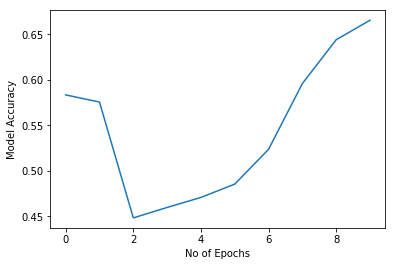

In [43]:
plt.plot(res1.history['acc'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

Text(0, 0.5, 'Model Accuracy')

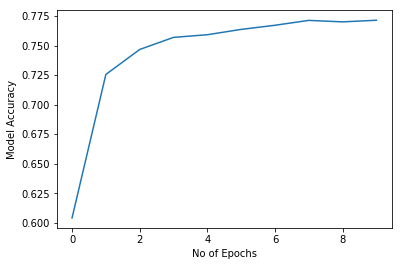

In [44]:
plt.plot(res2.history['acc'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

Text(0, 0.5, 'Model Accuracy')

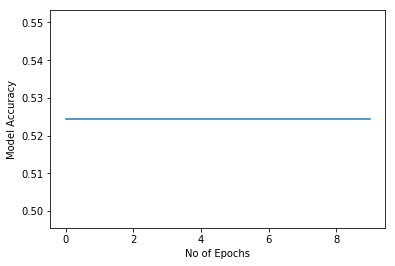

In [45]:
plt.plot(res3.history['acc'])
plt.xlabel("No of Epochs")
plt.ylabel("Model Accuracy")

# Discuss about the choice of network structures and performance of it as you change the structures.

In this assignment I have tried to implement three different neural network structures by making an inital model ad then making additions to the same by adding the neurons and hidden layers and the different activation functions being used and the optimizers which have been used to make different model. 

1. We can see above the first model has an accuracy of 76 % which is very good as it has just five hidden layers and the same activation function throughout. 
2. For the second model we can see that after increasing the number of hidden layers and neurons and changing the activation functions we are getting an accuracy of 77 % which is better than the first model but not a big improvement as such.
3. The third model has been even further modified by increasing the number of hidden layers and neurons and the activation functions however the accuracy is just 52 % which is very poor compared to the first two models. 

I implemented these three models after playing around with the different things such as the neurons, hiddenlayers, activation fucntions and optimizers. The accuracy of the model depends on all of these and these in the right proportion will give us maximum accuracy where as when not taken in the right manner will give us a result something like what we see in the third model. As the amount of time was less I was unable to find the right combination. However after further exploring and playing around we can have better results.

# What do you think about the results? 

My expectation was that the last model will have best accuracy but the opposite has been observed. As I develop the models further they will improve and give better accuracy. This is something which I was unable to achieve because of  not exploring the neural networks enough to understand how do the models behave and how can we have the best accuracy.

# Conclusions

This assignment helped me get an idea about deepp learning and how to implement them and I enjoyed exploring the different network structures. If we could have had some more time we would be able to learn much more from this assignment.

# Extra Credit

- [OPT 1] Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources or MAMBA cluster for this test. 


I have implemented the same code on Google Collab and I have got the following result:
https://colab.research.google.com/drive/12dyBPAR9keCjqV8q1fBF87L7NtvoODA9#scrollTo=jwqOQc6ZPpqi


Jupyter Runtime
40.52285606716931

Google Colab Runtime
56.474742090999996

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 


In [46]:
elapsed = timeit.default_timer() - start_time

In [47]:
elapsed

40.52285606716931